# Finding Best Restaurents In Banglore
## we are going solve this problem in the following way
###  1. First identifying the problem 
###  2. Loading required libraries
###  3. Loading data set
###  4. Checking null values
###  5. Removing unnecessary columns & Renaming column names if required
###  6. Visualisations

In [11]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#importing data set

zom=pd.read_csv('zomato.csv')

In [13]:
#checking the shape of data set

zom.shape

(51717, 17)

In [14]:
#checking the information of data

zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [15]:
#viewing top 5 rows data

zom.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [16]:
#viewing last 5 columns of data

zom.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [17]:
#Deleting unnecessary columns and changing column names

del zom['url']
del zom['address']
del zom['phone']
del zom['location']
del zom['reviews_list']
zom.rename(columns={'approx_cost(for two people)': 'avg_cost', 'listed_in(type)': 'serv_type', 'listed_in(city)' :'locality' } , inplace= True)
zom.head()


,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,menu_item,serv_type,locality
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [18]:
# Replacing NEW value in rate column with np.NaN & Replacing _ with np.NaN & droping all null values in rate column

zom['rate'] = zom['rate'].replace('NEW',np.NaN)
zom['rate'] = zom['rate'].replace('-',np.NaN)
zom.dropna(how = 'any', inplace = True)

In [19]:
# In rating we are replacing /5 with ' '

zom['rate'] = zom.loc[:,'rate'].replace('[ ]','',regex = True)
zom['rate'] = zom['rate'].astype(str)
zom['rate'] = zom['rate'].apply(lambda r: r.replace('/5',''))
zom['rate'] = zom['rate'].apply(lambda r: float(r))

In [20]:
#checking null values with percentage

total = zom.isnull().sum().sort_values(ascending=False)
percent_1 = zom.isnull().sum()/zom.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
locality,0,0.0
serv_type,0,0.0
menu_item,0,0.0
avg_cost,0,0.0
cuisines,0,0.0


In [21]:
#Removing string in avg_cost column

zom['avg_cost'] = zom['avg_cost'].str.replace(',','')
zom['avg_cost'] = zom['avg_cost'].astype(int)

In [22]:
#Viewing DataFrame

pd.DataFrame(zom)

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,menu_item,serv_type,locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,[],Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,[],Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,[],Cafes,Banashankari
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,[],Cafes,Banashankari


# Visualisations

Text(0.5, 1.0, 'Restaurents having online delivery service or not')

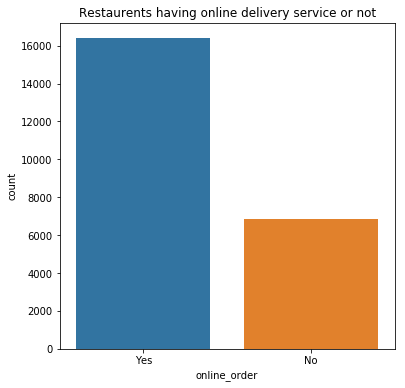

In [23]:
#Restaurents having online delivery service or not

sns.countplot(x=zom['online_order'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurents having online delivery service or not')

Text(0.5, 1.0, 'Restaurents having table booking service or not')

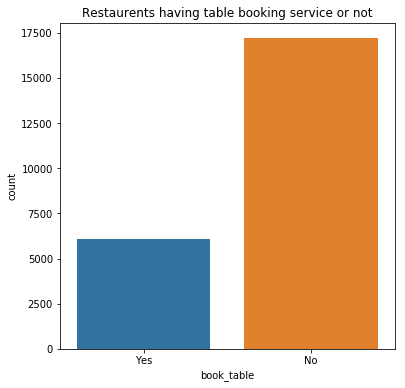

In [24]:
#Restaurents having table booking service or not

sns.countplot(x=zom['book_table'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurents having table booking service or not')

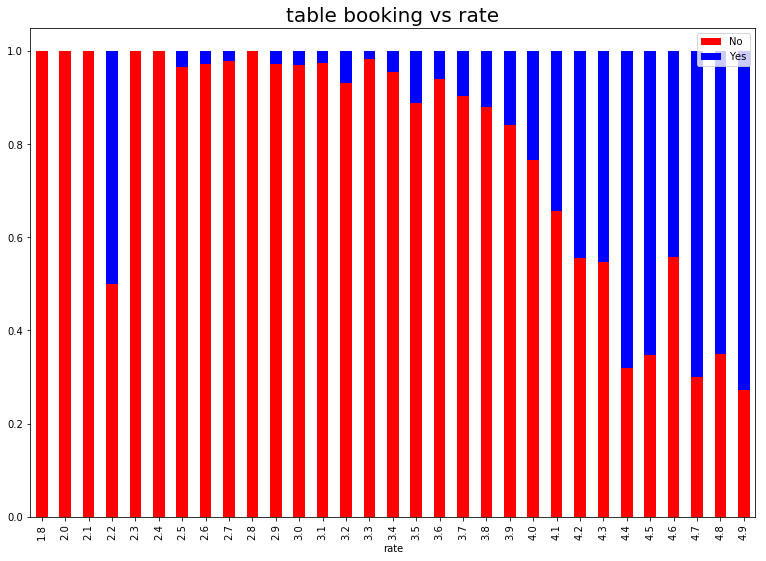

In [25]:
#Table booking_table and Rating

plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zom['rate'], zom['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','blue'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Locality')

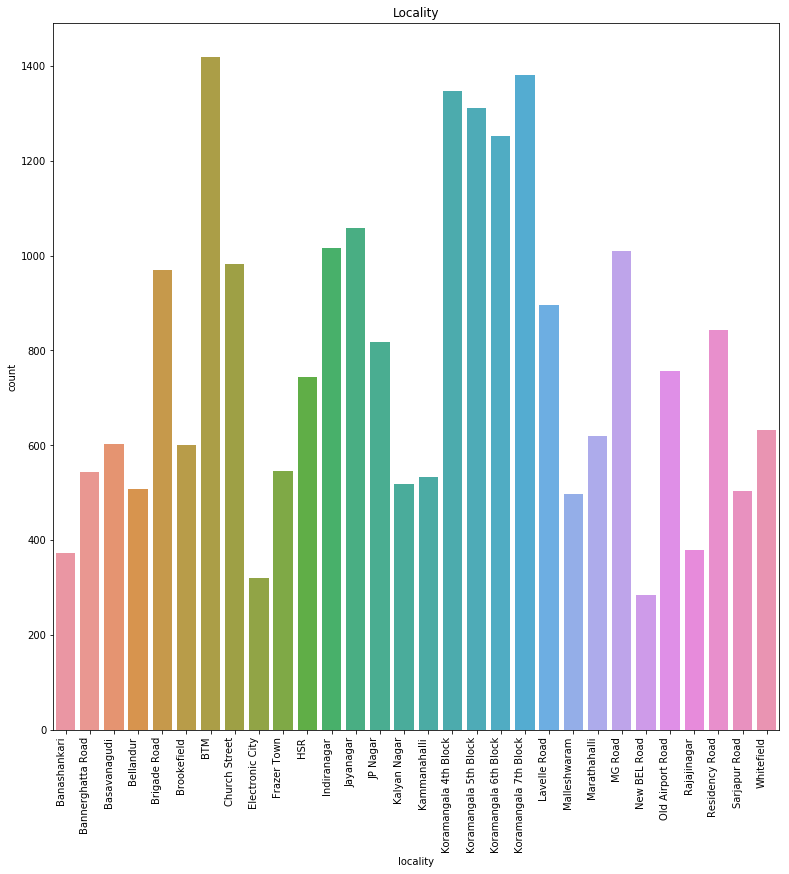

In [26]:
# Location

sns.countplot(zom['locality'])
sns.countplot(zom['locality']).set_xticklabels(sns.countplot(zom['locality']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Locality')

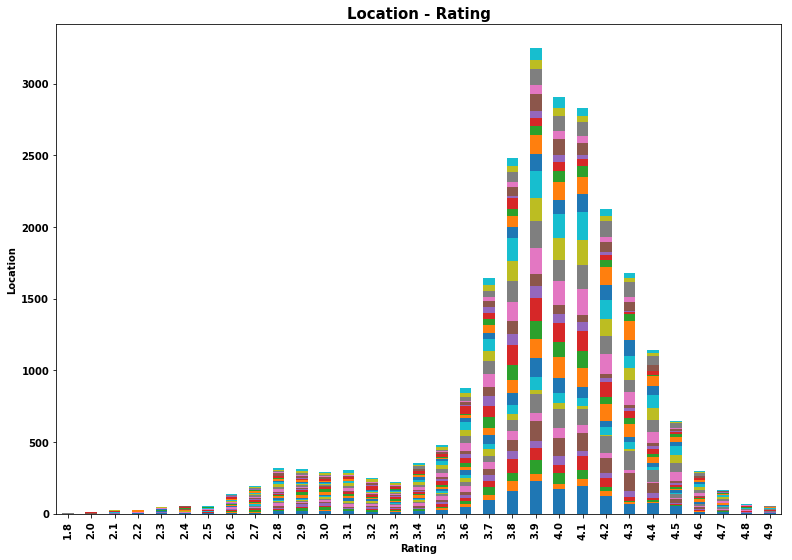

In [27]:
#Location and Rating

loc_plt=pd.crosstab(zom['rate'],zom['locality'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();


Text(0.5, 1.0, 'Restuarant Type')

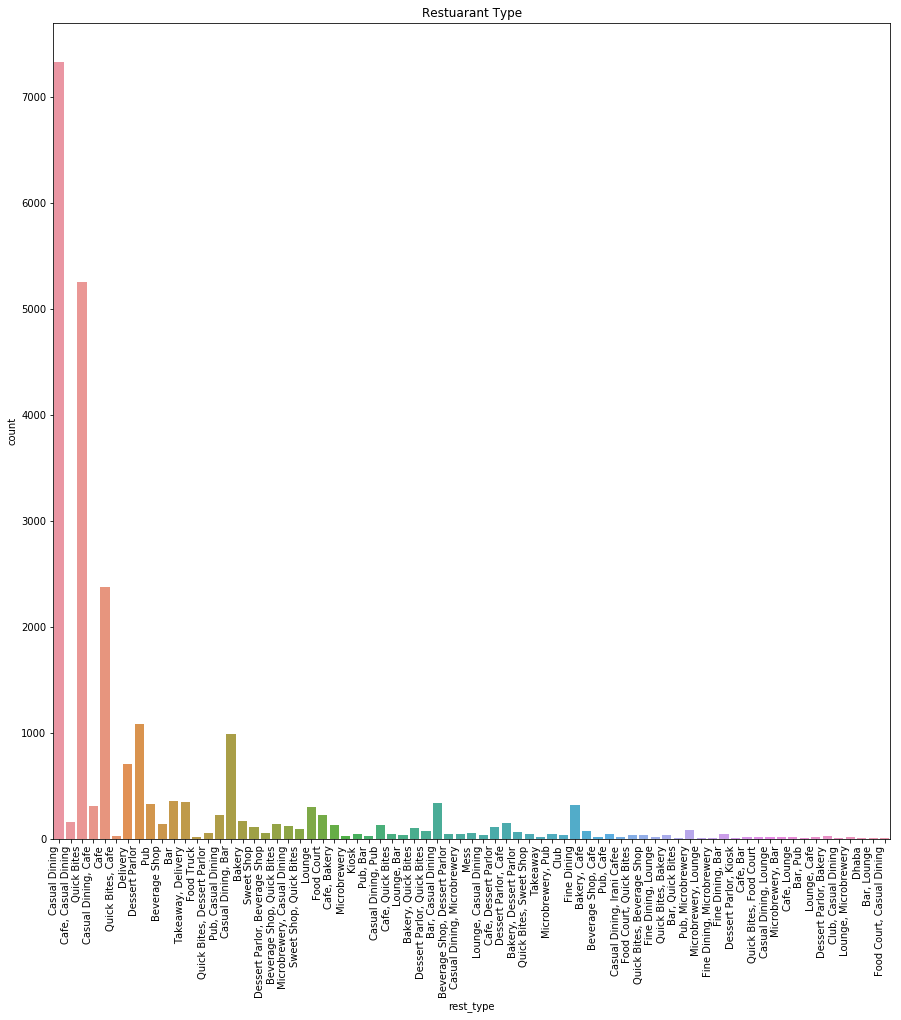

In [28]:
#Restaurant Type

sns.countplot(zom['rest_type'])
sns.countplot(zom['rest_type']).set_xticklabels(sns.countplot(zom['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

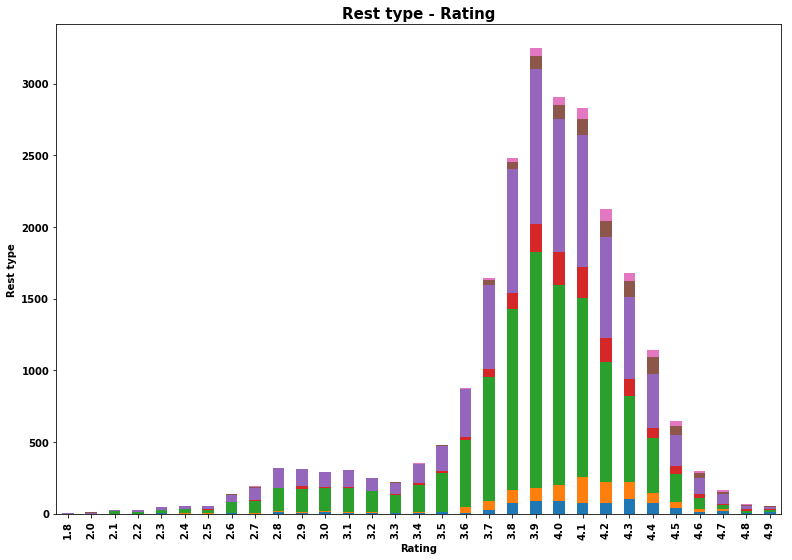

In [29]:
#Restaurent Type and Rating

loc_plt=pd.crosstab(zom['rate'],zom['serv_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

Text(0.5, 1.0, 'Type of Service')

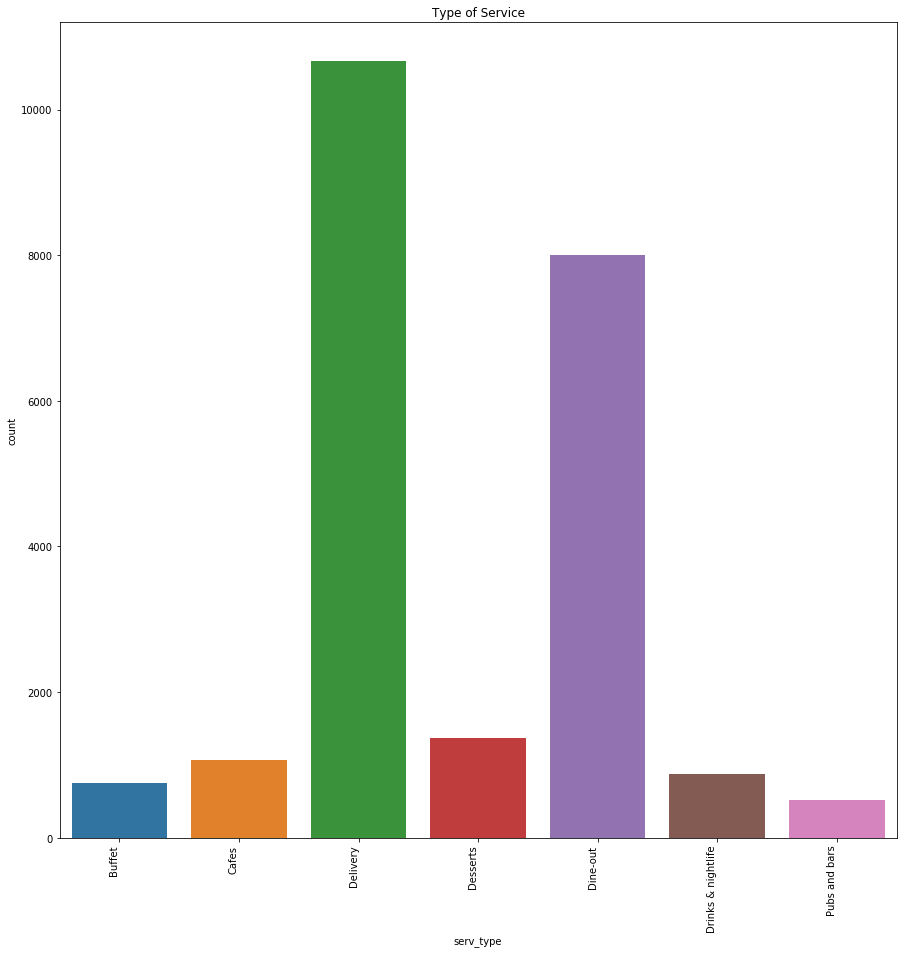

In [30]:
#Types of Services

sns.countplot(zom['serv_type'])
sns.countplot(zom['serv_type']).set_xticklabels(sns.countplot(zom['serv_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

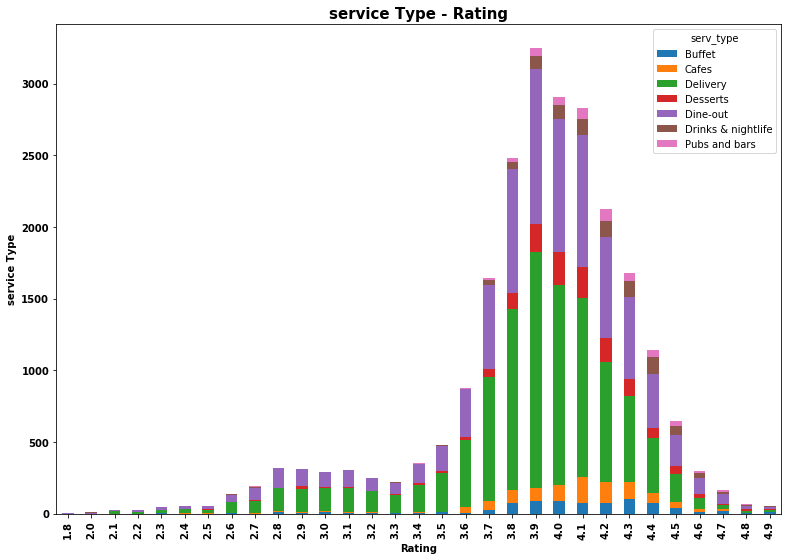

In [31]:
#service_Type and Rating

type_plt=pd.crosstab(zom['rate'],zom['serv_type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('service Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('service Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 1.0, 'Cost of Restuarant')

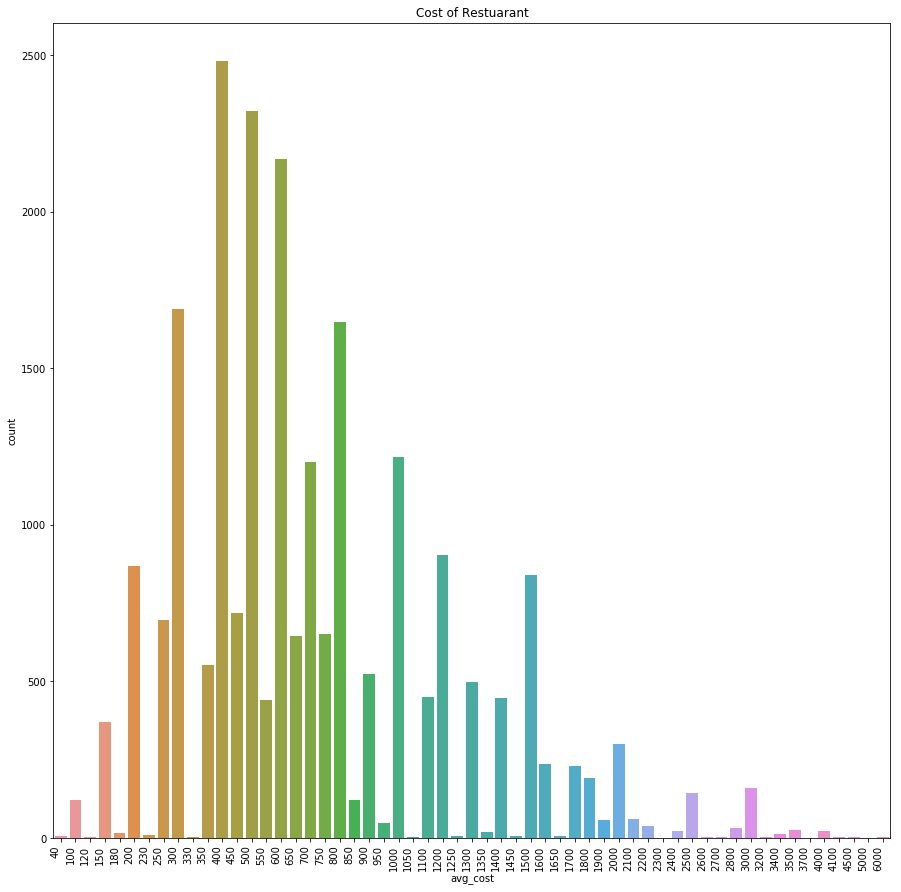

In [32]:
# avg_Cost for two people in Restuarants

sns.countplot(zom['avg_cost'])
sns.countplot(zom['avg_cost']).set_xticklabels(sns.countplot(zom['avg_cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')


Text(0.5, 1.0, 'NO. of restaurants in a Location')

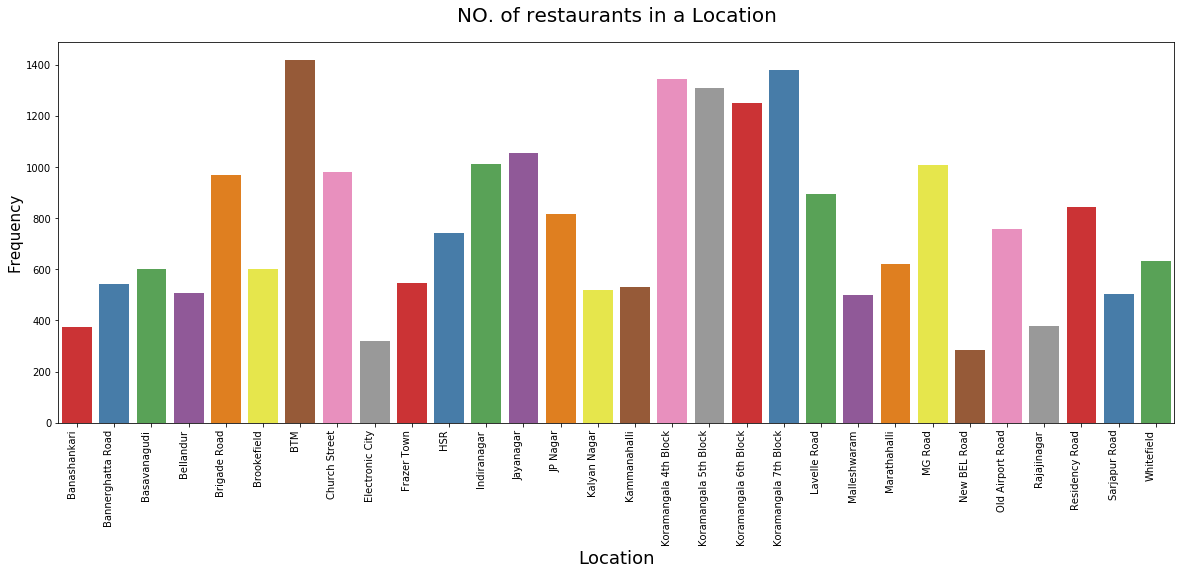

In [33]:
#NO. of restaurants in a Location

fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="locality",data=zom, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 1.0, 'Restaurant types')

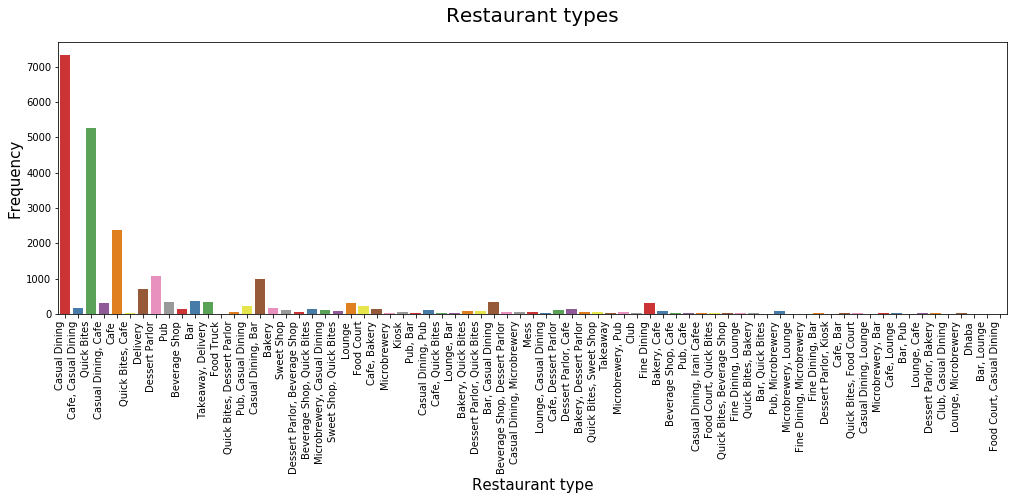

In [34]:
#Restaurant type

fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zom, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

Text(0.5, 0, 'Number of outlets')

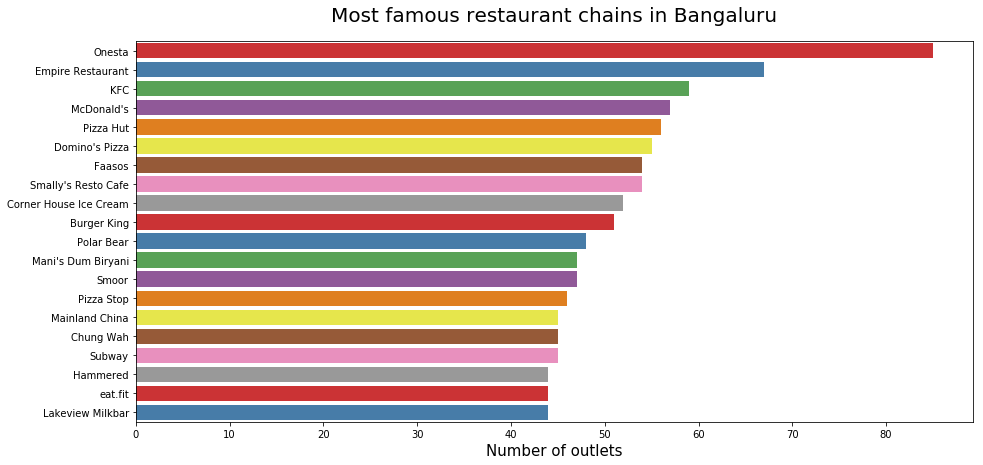

In [35]:
# Most famous restaurant in Bengaluru

plt.figure(figsize=(15,7))
chains=zom['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

In [37]:
# X.average_cost.describe()
# maxi=X.average_cost.max()
# mean=X.rate.mean()
# print(mean)
zom= zom.drop_duplicates(subset='name',keep='first')
# dups_name = X1.pivot_table(index=['name'],aggfunc='size')
newz=zom[['name','avg_cost','locality','rest_type','cuisines']].groupby(['avg_cost'], sort = True)
newz=newz.filter(lambda zom: zom.mean() <= 1500)
newz=newz.sort_values(by=['avg_cost'])

newz_expensive=zom[['name','avg_cost','locality','rest_type','cuisines']].groupby(['avg_cost'], sort = True)
newz_expensive=newz_expensive.filter(lambda zom: zom.mean() >= 3000)
newz_expensive=newz_expensive.sort_values(by=['avg_cost'])
newz

,name,avg_cost,locality,rest_type,cuisines
27091,Srinidhi Sagar Deluxe,40,Koramangala 4th Block,Quick Bites,"South Indian, North Indian, Chinese"
5270,Srinidhi Sagar Food Line,40,Brigade Road,Quick Bites,"South Indian, North Indian, Chinese"
17773,Srinidhi Sagar,40,Indiranagar,Quick Bites,"South Indian, North Indian, Chinese"
11190,Nammura Upahara,100,BTM,Quick Bites,South Indian
5746,Rescafe,100,Brigade Road,Quick Bites,Beverages
8415,Shiv Shakthi,100,BTM,Quick Bites,"Street Food, North Indian"
3972,Poha On Wheels,100,Bellandur,"Takeaway, Delivery",Street Food
3561,Iyengar's Inn,100,Basavanagudi,Quick Bites,South Indian
4397,Mumbai Kulfi,100,Bellandur,Dessert Parlor,Ice Cream
3529,Brahmin Tiffins & Coffee,100,Basavanagudi,Quick Bites,South Indian


In [38]:
newz_rate=zom[['name','rate']].groupby(['rate'], sort = True)
newz_rate=newz_rate.filter(lambda zom: zom.mean() >= 4.5)
newdf_rate=newz_rate.sort_values(by=['rate'])
zom.rate.value_counts()
zom.rate.unique()
zom.nunique()
newz_rate

,name,rate
7,Onesta,4.6
164,The Blue Wagon - Kitchen,4.6
181,Shakes Theory,4.5
632,Taaza Thindi,4.7
868,Barbeque Nation,4.7
922,eat.fit,4.5
933,XO Belgian Waffle,4.5
1035,Galito's,4.6
2241,Hakuna Matata,4.5
2246,Hunger Camp,4.6


In [40]:
z1 = pd.merge(newz, newz_rate, how='inner', on=['name'])

z2= pd.merge(newz_expensive, newz_rate, how='inner', on=['name'])

print("Cheap restaurants with low cost,high rating \n")
z1

Cheap restaurants with low cost,high rating 



,name,avg_cost,locality,rest_type,cuisines,rate
0,Brahmin's Coffee Bar,100,Basavanagudi,Quick Bites,South Indian,4.8
1,Taaza Thindi,100,Banashankari,Quick Bites,South Indian,4.7
2,CTR,150,Malleshwaram,Quick Bites,South Indian,4.7
3,Veena Stores,150,Malleshwaram,Quick Bites,South Indian,4.5
4,Chikkanna Tiffin Room,150,Brigade Road,Quick Bites,South Indian,4.5
5,O.G. Variar & Sons,200,Malleshwaram,Bakery,"Bakery, Desserts",4.8
6,Mavalli Tiffin Room (MTR),250,Basavanagudi,Quick Bites,South Indian,4.5
7,Siddiqu Kabab Center,250,Brigade Road,Quick Bites,"North Indian, Rolls",4.5
8,HOMMS,300,Brookefield,Quick Bites,"Chinese, Beverages, Momos, Thai",4.5
9,The Pancake Story,300,BTM,Dessert Parlor,"Desserts, Beverages",4.6


In [41]:
print("Expensive restaurants with high cost,high rating \n")
z2

Expensive restaurants with high cost,high rating 



,name,avg_cost,locality,rest_type,cuisines,rate
0,Rim Naam - The Oberoi,3000,Brigade Road,Fine Dining,Thai,4.6
1,Karavalli - The Gateway Hotel,3500,Brigade Road,Fine Dining,"Mangalorean, Konkan, Seafood, Kerala",4.5
2,Alba - JW Marriott Bengaluru,4000,Brigade Road,Fine Dining,Italian,4.5


In [43]:
# X1.votes.describe()
newz_votes=zom[['name','votes']].groupby(['votes'], sort = True)
newz_votes=newz_votes.filter(lambda zom: zom.mean() >= 175)
newz_votes=newz_votes.sort_values(by=['votes'])
# newdf_votes

In [46]:
z = pd.merge(z1, newz_votes, how='inner', on=['name'])
z=z.sort_values(by=['avg_cost'])
print("Cheap restaurants,high rating,high votes")
z

Cheap restaurants,high rating,high votes


,name,avg_cost,locality,rest_type,cuisines,rate,votes
0,Brahmin's Coffee Bar,100,Basavanagudi,Quick Bites,South Indian,4.8,2679
1,Taaza Thindi,100,Banashankari,Quick Bites,South Indian,4.7,651
2,CTR,150,Malleshwaram,Quick Bites,South Indian,4.7,4408
3,Veena Stores,150,Malleshwaram,Quick Bites,South Indian,4.5,2407
4,Chikkanna Tiffin Room,150,Brigade Road,Quick Bites,South Indian,4.5,203
5,O.G. Variar & Sons,200,Malleshwaram,Bakery,"Bakery, Desserts",4.8,1156
6,Mavalli Tiffin Room (MTR),250,Basavanagudi,Quick Bites,South Indian,4.5,2896
7,HOMMS,300,Brookefield,Quick Bites,"Chinese, Beverages, Momos, Thai",4.5,224
8,Mugful Of Stories,300,Kalyan Nagar,Dessert Parlor,"Desserts, Bakery",4.6,274
13,XO Belgian Waffle,400,Bannerghatta Road,Dessert Parlor,"Desserts, Beverages",4.5,549


In [47]:
z = pd.merge(z2, newz_votes, how='inner', on=['name'])
z=z.sort_values(by=['avg_cost'])
z

,name,avg_cost,locality,rest_type,cuisines,rate,votes
0,Rim Naam - The Oberoi,3000,Brigade Road,Fine Dining,Thai,4.6,979
1,Karavalli - The Gateway Hotel,3500,Brigade Road,Fine Dining,"Mangalorean, Konkan, Seafood, Kerala",4.5,674
2,Alba - JW Marriott Bengaluru,4000,Brigade Road,Fine Dining,Italian,4.5,583
